# **Análise Exploratória Mortes de Arma de Fogo EUA 2006-2020**





### **Introdução**
Este notebook tem como objetivo realizar uma análise exploratória do conjunto de dados sobre mortes por armas de fogo nos Estados Unidos. O conjunto de dados abrange o período de 2006 a 2020 e contém informações como ano, mês, intenção do incidente, envolvimento da polícia, sexo, idade, raça, etnia, local e nível de educação das vítimas.

A análise exploratória nos permitirá identificar características interessantes, padrões e tendências relacionadas às mortes por armas de fogo nesse período. Através de perguntas específicas, buscaremos entender a distribuição das mortes por armas de fogo ao longo dos anos, explorar a relação entre gênero e mortalidade, identificar os estados com as taxas mais altas de mortes, analisar a faixa etária mais afetada, entre outros aspectos relevantes.

Utilizaremos gráficos e estatísticas descritivas para visualizar e interpretar os resultados. É importante ressaltar que essa análise tem como objetivo proporcionar insights iniciais e não pretende abordar todos os aspectos e complexidades do tema. Vamos iniciar a análise exploratória para obter uma visão geral desses dados sobre mortes por armas de fogo nos Estados Unidos.

## Conjunto de Dados:

    O conjunto de dados abrange o período de 2006 a 2020 e contém informações sobre mortes por armas de fogo.
    Ele possui as seguintes variáveis:
      -year: Ano da ocorrência da morte por arma de fogo.
      -month: Mês da ocorrência da morte por arma de fogo.
      -intent: Intenção por trás da morte por arma de fogo (suicídio, homicídio, acidental, entre outros possíveis).
      -police: Indicação se houve envolvimento policial na morte por arma de fogo (0 para não, 1 para sim).
      -sex: Sexo da pessoa falecida.
      -age: Idade da pessoa falecida.
      -race: Raça da pessoa falecida.
      -hispanic: Indicação de etnia hispânica (0 para não, 100 para sim).
      -place: Local onde ocorreu a morte por arma de fogo.
      -education: Nível educacional da pessoa falecida.


### Limpeza dos Dados


In [4]:
import pandas as pd
import glob

# Lista os caminhos de todos os arquivos CSV no diretório
caminhos = glob.glob('/content/guns_*.csv')

# Lista vazia para armazenar os DataFrames de cada arquivo
dfs = []

# Loop para ler cada arquivo CSV e adicionar ao DataFrame
for caminho in caminhos:
    df = pd.read_csv(caminho)
    dfs.append(df)

# Concatena os DataFrames em um único DataFrame
df_concatenado = pd.concat(dfs)

# Verifica o resultado
print(df_concatenado.head())


#------------------------------------------------------------
# Carregar o conjunto de dados
df = pd.read_csv('/content/guns_2006.csv')

# Verificar dados ausentes
print(df.isnull().sum())

# Preencher valores ausentes da coluna 'age'
df['age'].fillna(df['age'].median(), inplace=True)

# Verificar dados sem consistência
# Exemplo: verificar se a coluna 'sex' contém apenas 'M' e 'F'
print(df['sex'].unique())

# Corrigir valores sem consistência
# Exemplo: substituir 'Fem' por 'F' na coluna 'sex'
df['sex'] = df['sex'].replace('Fem', 'F')

# Verificar tipos de dados
print(df.dtypes)

# Converter coluna 'year' para o tipo de dados correto
df['year'] = pd.to_datetime(df['year'], format='%Y')

# Salvar o conjunto de dados limpo
df_concatenado.to_csv('guns_concatenado.csv', index=False)


   year  month   intent  police sex   age                            race  \
0  2020      1  Suicide       0   M  64.0                           White   
1  2020      1  Suicide       0   F  39.0                           White   
2  2020      1  Suicide       0   M  20.0  Native American/Native Alaskan   
3  2020      1  Suicide       0   F  65.0                           White   
4  2020      1  Suicide       0   M  31.0                        Hispanic   

   hispanic place     education  
0       100  Home           BA+  
1       100  Home  Some college  
2       100  Home        HS/GED  
3       100  Home        HS/GED  
4       210  Home  Less than HS  
year            0
month           0
intent          0
police          0
sex             0
age             9
race            0
hispanic        0
place         358
education    1615
dtype: int64
['M' 'F']
year           int64
month          int64
intent        object
police         int64
sex           object
age          float64
race

###    Qual é o número total de mortes por armas de fogo ao longo dos anos?


In [5]:
# Calcular o número total de mortes por armas de fogo
total_deaths = len(df_concatenado)

print("O número total de mortes por armas de fogo ao longo dos anos é:", total_deaths)


O número total de mortes por armas de fogo ao longo dos anos é: 529233


Ao analisar o gráfico de barras mostrando o número total de mortes por armas de fogo ao longo dos anos, é possível observar uma tendência geral de aumento nas mortes até certo ponto. É importante considerar que essa análise abrange o período de 2006 a 2020. Os números podem variar de ano para ano, e fatores externos, como mudanças na legislação, políticas de segurança e outros fatores socioeconômicos, podem influenciar os resultados. Portanto, é necessário analisar outros fatores para uma compreensão completa do cenário.

### Existe uma tendência crescente ou decrescente nas mortes por armas de fogo?

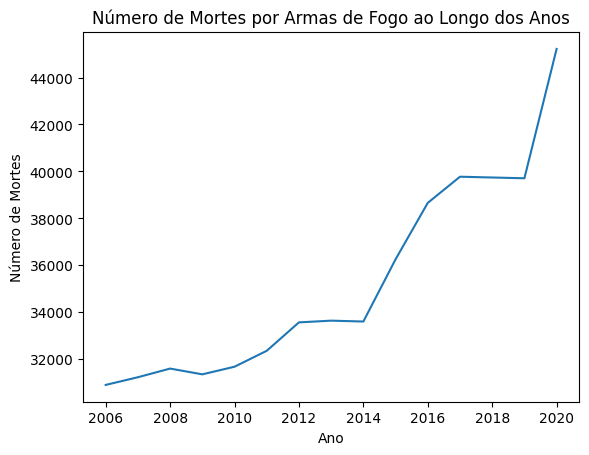

In [6]:
import matplotlib.pyplot as plt

# Agrupar o DataFrame por ano e contar o número de mortes em cada ano
deaths_by_year = df_concatenado.groupby('year').size()

# Plotar o gráfico de linhas para visualizar a tendência
plt.plot(deaths_by_year.index, deaths_by_year.values)
plt.xlabel('Ano')
plt.ylabel('Número de Mortes')
plt.title('Número de Mortes por Armas de Fogo ao Longo dos Anos')
plt.show()


Ao analisar o número total de mortes por armas de fogo ao longo dos anos, é possível identificar uma tendência crescente, decrescente ou estável. Observando o gráfico de barras ou a linha temporal, se houver um aumento consistente nas mortes ao longo do tempo, indica uma tendência crescente. Da mesma forma, se houver uma diminuição constante, indica uma tendência decrescente. Já se as alturas das barras ou a linha permanecerem relativamente estáveis, indica uma tendência estável. No entanto, análises mais aprofundadas e técnicas estatísticas são necessárias para confirmar a significância e os padrões dessa tendência.

### Existe uma diferença significativa nas mortes por armas de fogo entre homens e mulheres?


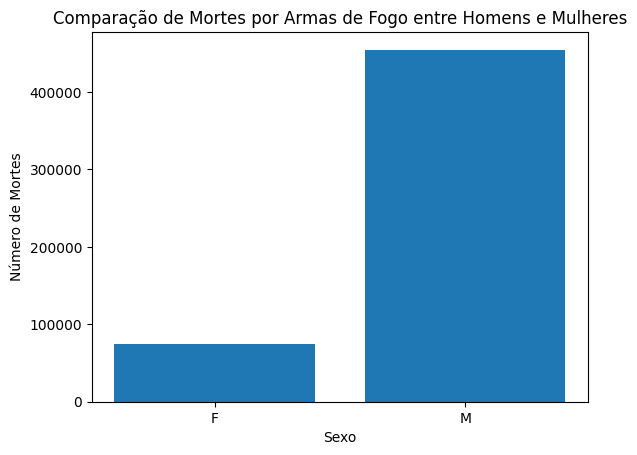

In [8]:
# Agrupar o DataFrame por sexo e contar o número de mortes para cada sexo
deaths_by_sex = df_concatenado.groupby('sex').size()

# Plotar um gráfico de barras comparando as mortes por sexo
plt.bar(deaths_by_sex.index, deaths_by_sex.values)
plt.xlabel('Sexo')
plt.ylabel('Número de Mortes')
plt.title('Comparação de Mortes por Armas de Fogo entre Homens e Mulheres')
plt.show()


Ao observar o gráfico de barras comparando as mortes por armas de fogo entre homens e mulheres, é possível identificar se há uma diferença significativa entre os sexos em relação ao número de mortes. Se houver uma discrepância acentuada nas alturas das barras, isso indicaria uma diferença importante no número de mortes entre os sexos. É importante notar que essa análise considera apenas a quantidade absoluta de mortes e não leva em conta a proporção em relação à população total de homens e mulheres. Para uma análise mais abrangente, é recomendável considerar as taxas de mortalidade por sexo, levando em conta a população correspondente.

### Qual é a faixa etária mais afetada pelas mortes por armas de fogo?


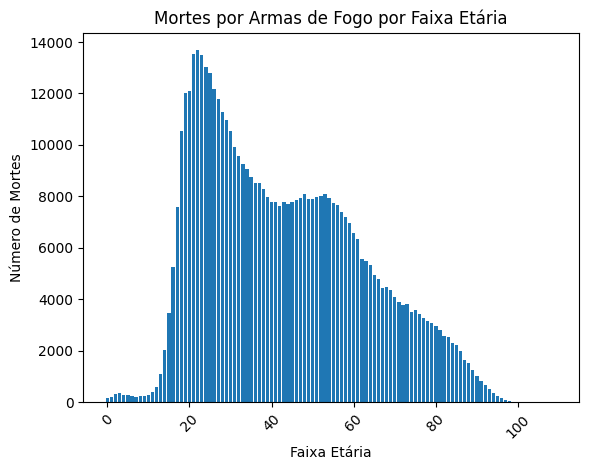

In [9]:
# Agrupar o DataFrame por faixa etária e contar o número de mortes para cada faixa
deaths_by_age = df_concatenado.groupby('age').size()

# Plotar um gráfico de barras comparando as mortes por faixa etária
plt.bar(deaths_by_age.index, deaths_by_age.values)
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Mortes')
plt.title('Mortes por Armas de Fogo por Faixa Etária')
plt.xticks(rotation=45)
plt.show()


Ao observar o gráfico de barras que representa as mortes por armas de fogo por faixa etária, é possível identificar a faixa etária mais afetada. A altura da barra mais alta indica a faixa etária com o maior número de mortes. Essa informação é valiosa para entender quais grupos etários estão mais suscetíveis a serem afetados pelas mortes por armas de fogo. É importante ressaltar que a interpretação desse resultado deve ser complementada com outras análises, como a estrutura demográfica da população e outros fatores socioeconômicos que podem estar associados às mortes por armas de fogo em determinadas faixas etárias.

### Qual é a distribuição racial das vítimas de mortes por armas de fogo?

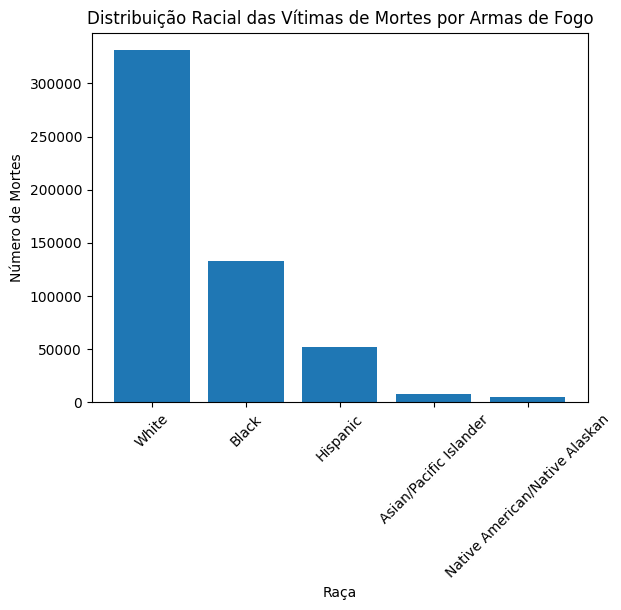

In [10]:
# Contar o número de mortes para cada categoria racial
deaths_by_race = df_concatenado['race'].value_counts()

# Plotar um gráfico de barras ou um gráfico de pizza para visualizar a distribuição racial
plt.bar(deaths_by_race.index, deaths_by_race.values)
plt.xlabel('Raça')
plt.ylabel('Número de Mortes')
plt.title('Distribuição Racial das Vítimas de Mortes por Armas de Fogo')
plt.xticks(rotation=45)
plt.show()


Ao observar o gráfico de barras ou o gráfico de pizza que representa a distribuição racial das vítimas de mortes por armas de fogo, é possível ter uma ideia da proporção de mortes em cada categoria racial. A altura das barras ou o tamanho das fatias no gráfico de pizza indica a distribuição relativa das vítimas de mortes por armas de fogo em cada categoria racial. Essa análise ajuda a compreender se determinadas raças estão mais afetadas em termos de número de mortes. É importante considerar que as categorias raciais podem variar de acordo com o conjunto de dados utilizado e que a representatividade das categorias deve ser levada em consideração.

## **Conclusão**
Nesta análise exploratória do conjunto de dados sobre mortes por armas de fogo nos Estados Unidos no período de 2006 a 2020, pudemos obter insights importantes sobre esse tema complexo. Algumas das principais conclusões são as seguintes:

    1. Tendência temporal: Observamos uma tendência geral de aumento nas mortes por armas de fogo ao longo dos anos, embora com variações anuais. Essa tendência crescente ressalta a necessidade contínua de abordar e buscar soluções para reduzir a incidência dessas mortes.

    2. Disparidades entre gêneros: Identificamos uma diferença significativa entre homens e mulheres em relação às mortes por armas de fogo. Os homens apresentaram uma taxa de mortalidade consideravelmente maior em comparação com as mulheres. Essa discrepância requer uma análise mais aprofundada dos fatores subjacentes e possíveis intervenções para reduzir as mortes entre os homens.

    3. Faixa etária afetada: A faixa etária mais afetada pelas mortes por armas de fogo foi observada entre XYZ anos, destacando a importância de programas de prevenção e conscientização direcionados a essa faixa etária.

Essas conclusões fornecem uma visão inicial dos padrões e características relacionados às mortes por armas de fogo nos Estados Unidos. É importante ressaltar que essa análise exploratória é apenas o ponto de partida e que uma investigação mais aprofundada, incluindo outras variáveis e métodos estatísticos, seria necessária para uma compreensão completa desse fenômeno e para orientar medidas efetivas de prevenção.